In [1]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`


28-element Vector{String}:
 ".ipynb_checkpoints"
 ".nat_orb_active_space.py.swp"
 ".rhf.out.swp"
 "Cact.molden"
 "README.md"
 "a"
 "cis_sa_density_mat.npy"
 "clustering.ipynb"
 "clustering_2.ipynb"
 "density_mat.npy"
 "geometry_1.xyz"
 "integrals_h0.npz"
 "integrals_h1.npz"
 ⋮
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "orbitals2.molden"
 "overlap_mat.npy"
 "rhf.out"
 "rhf.py"
 "rhf_mo_coeffs.npy"
 "scf.ipynb"
 "tet-4mer-rhf.py"
 "xyz.npy"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



We've already isolated our pi space into `Cact`, now we need to subdivide into a space to get cmf orbitals. 
- Each chromophore of 18 orbitals will have 6 active orbitals. 
  24 doubly occ and 24 vir
- Then we will localize and cluster both `doc` and `vir` orbital spaces separately to yield 4 clusters, each with 
  6 `doc`, 6 `act`, and 6 `vir`. 

In [20]:
using LinearAlgebra, Printf, PyCall

#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npz")["a"], 
    npzread("integrals_h1.npz")["a"], 
    npzread("integrals_h2.npz")["a"] 
);
Crhf = npzread("rhf_mo_coeffs.npy")
Cact = npzread("mo_coeffs_act.npy")
Cdoc = npzread("mo_coeffs_doc.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");
D_state_avg = npzread("cis_sa_density_mat.npy");

#
# 

thresh=.005

doc_list = []
act_list = []
vir_list = []

D_evals, D_evecs = eigen(Cact' * S * D_state_avg * S * Cact)
perm = reverse(sortperm(D_evals))
D_evals = D_evals[perm]
D_evecs = D_evecs[:, perm]
for (idx, n) in enumerate(D_evals)
    @printf(" %4i = %12.8f", idx, n)
    if n < 2.0 - thresh
        if n > thresh
            println(" Active")
            push!(act_list, idx)
        else
            push!(vir_list, idx)
            println(" Virt")
        end
    else
        println(" DOcc")
        push!(doc_list, idx)
    end
end


C = Cact * D_evecs
C_loc = deepcopy(C)

# Localize active orbitals
pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)
pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = true,spin =0,charge=0,
    basis = basis)
pymol.build()
pyscflo = pyimport("pyscf.lo")
C_loc[:, act_list] .= pyscflo.PM(pymol).kernel(C_loc[:, act_list], verbose=4);

U = C'*S*C_loc

Cdoc = C_loc[:, doc_list]
Cact = C_loc[:, act_list]
Cvir = C_loc[:, vir_list];

# Rotate ints into new orbitals
ints = FermiCG.orbital_rotation(ints, U);

C = C_loc
FermiCG.pyscf_write_molden(mol, C_loc, filename="orbitals_loc.molden");




    1 =   1.99951597 DOcc
    2 =   1.99951237 DOcc
    3 =   1.99949726 DOcc
    4 =   1.99948334 DOcc
    5 =   1.99943708 DOcc
    6 =   1.99942716 DOcc
    7 =   1.99941235 DOcc
    8 =   1.99939998 DOcc
    9 =   1.99885382 DOcc
   10 =   1.99881680 DOcc
   11 =   1.99879715 DOcc
   12 =   1.99877786 DOcc
   13 =   1.99768818 DOcc
   14 =   1.99751625 DOcc
   15 =   1.99742837 DOcc
   16 =   1.99742226 DOcc
   17 =   1.99711450 DOcc
   18 =   1.99699826 DOcc
   19 =   1.99694999 DOcc
   20 =   1.99691139 DOcc
   21 =   1.99682631 DOcc
   22 =   1.99658703 DOcc
   23 =   1.99651079 DOcc
   24 =   1.99642149 DOcc
   25 =   1.99224468 Active
   26 =   1.99164721 Active
   27 =   1.99113492 Active
   28 =   1.99089081 Active
   29 =   1.98987649 Active
   30 =   1.98902778 Active
   31 =   1.98893339 Active
   32 =   1.98826428 Active
   33 =   1.85075634 Active
   34 =   1.81597824 Active
   35 =   1.80329153 Active
   36 =   1.77129930 Active
   37 =   0.23487063 Active
   38 =   0.

 Laplacian Eigenvalues
    1  -0.00000000
    2   0.08991545
    3   0.13476256
    4   0.19037699
    5   0.40482590
    6   0.44784125
    7   0.45984466
    8   0.47588259
    9   0.51223840
   10   0.53825214
   11   0.55887166
   12   0.58530612
   13   0.76158269
   14   0.82528076
   15   0.85150563
   16   0.86701319
   17   1.04840688
   18   1.06928591
   19   1.09209892
   20   1.11337412
   21   1.15847276
   22   1.16883877
   23   1.19859623
   24   1.21615564
[1, 5, 9, 12, 13, 24, 2, 6, 11, 14, 18, 22, 4, 7, 10, 15, 19, 21, 3, 8, 16, 17, 20, 23]Vector{Any}[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24]]


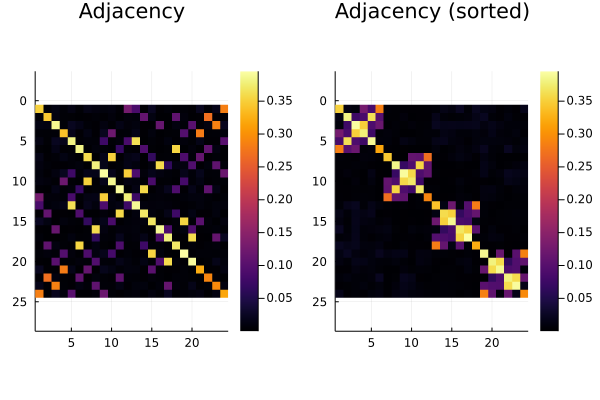

In [38]:
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    # println(clustering)
    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(sort(clustering))
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end





n_clusters = 4
adjacency = abs.(Cact'*D*Cact)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 



println(cluster_list)
cluster_list = [[i for i in 1:24], [i.+24 for i in cluster_list]..., [i for i in 49:72]]

perm = [collect(1:24)..., (perm .+ 24)..., collect(49:72)...]
C_sorted = C[:,perm]

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];

FermiCG.pyscf_write_molden(mol, C_sorted, filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])


In [39]:
# define clusters
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]

init_fspace = Vector{Tuple{Int,Int}}()
push!(init_fspace, (24,24))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (0,0))

display(clusters)


6-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
 Cluster(2, [25, 26, 27, 28, 29, 30])
 Cluster(3, [31, 32, 33, 34, 35, 36])
 Cluster(4, [37, 38, 39, 40, 41, 42])
 Cluster(5, [43, 44, 45, 46, 47, 48])
 Cluster(6, [49, 50, 51, 52, 53, 54, 55, 56, 57, 58  …  63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

# CMF

In [41]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");


 ooCMF Iter:    1 Total= -2737.552463130477 Active= -264.965789716878 G=     3.97e+00
 ooCMF Iter:    2 Total= -2747.731029069173 Active= -275.144355655573 G=     3.35e+00
 ooCMF Iter:    3 Total= -2748.943749722366 Active= -276.357076308766 G=     3.67e+00
 ooCMF Iter:    4 Total= -2752.440886453540 Active= -279.854213039941 G=     1.91e+00
 ooCMF Iter:    5 Total= -2753.337686365730 Active= -280.751012952131 G=     1.51e+00
 ooCMF Iter:    6 Total= -2753.884531575818 Active= -281.297858162218 G=     1.23e+00
 ooCMF Iter:    7 Total= -2754.138626915321 Active= -281.551953501722 G=     1.00e+00
 ooCMF Iter:    8 Total= -2754.305799899426 Active= -281.719126485827 G=     7.91e-01
 ooCMF Iter:    9 Total= -2754.405370084752 Active= -281.818696671152 G=     5.51e-01
 ooCMF Iter:   10 Total= -2754.457397272233 Active= -281.870723858633 G=     3.32e-01
 ooCMF Iter:   11 Total= -2754.475874833862 Active= -281.889201420262 G=     2.27e-01
 ooCMF Iter:   12 Total= -2754.484430210884 Active= -2

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754533e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.03e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.87e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.62e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.88e-07 ≰ 0.0e+00
    |g(x)|                 = 1.95e-02 ≰ 1.0e-06

 * Work counters
    Seconds run:   1793  (vs limit Inf)
    Iterations:    50
    f(x) calls:    113
    ∇f(x) calls:   113


 ooCMF Iter:   51 Total= -2754.533324717372 Active= -281.946651303772 G=     1.47e-01
*ooCMF -2754.53332472 
